# PyCaret implementation

In [36]:
from unidecode import unidecode
import pandas as pd

In [37]:
df = pd.read_csv(r"C:\Users\Ana\Desktop\House-pricing-prediction-master\CSVs\EditedData_dfShort-cap.csv", encoding="utf-16")

In [38]:
for col in df:
    df.rename(columns = {col:unidecode(col)}, inplace = True)

In [39]:
data = df.sample(frac=0.8).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (923, 7)
Unseen Data For Predictions: (231, 7)


In [40]:
from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Pret') 

,Description,Value
0,Session id,5939
1,Target,Pret
2,Target type,Regression
3,Original data shape,"(923, 7)"
4,Transformed data shape,"(923, 7)"
5,Transformed train set shape,"(646, 7)"
6,Transformed test set shape,"(277, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [41]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,127897.7079,40019468736.3770,198778.5201,0.6729,0.4100,0.3510,0.0600
et,Extra Trees Regressor,119808.5512,39927983854.0482,198847.2754,0.6723,0.3936,0.3172,0.0460
lightgbm,Light Gradient Boosting Machine,133569.2001,42564874869.4140,203700.4414,0.6528,0.4268,0.3601,0.0410
gbr,Gradient Boosting Regressor,139120.1717,43079273717.0932,204926.8891,0.6479,0.4287,0.3803,0.0240
en,Elastic Net,148478.7164,46122443776.0000,213660.7859,0.6205,0.4525,0.4119,0.0080
br,Bayesian Ridge,148940.6375,46284366643.2000,214026.9375,0.6186,0.4539,0.4123,0.0070
ridge,Ridge Regression,149258.1312,46188351078.4000,213795.7000,0.6175,0.4583,0.4135,0.0070
lar,Least Angle Regression,149277.4906,46194667520.0000,213809.5781,0.6174,0.4585,0.4136,0.0070
llar,Lasso Least Angle Regression,149277.4000,46194667110.4000,213809.5734,0.6174,0.4585,0.4136,0.0080
lasso,Lasso Regression,149277.3969,46194665062.4000,213809.5703,0.6174,0.4585,0.4136,0.0100


RandomForestRegressor(n_jobs=-1, random_state=5939)

In [42]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114298.2340,27095928326.3874,164608.4090,0.8048,0.3536,0.3160
1,120034.2953,35353083910.7891,188024.1578,0.7309,0.4177,0.3674
2,122776.7446,37387108082.9571,193357.4619,0.5861,0.5091,0.4267
3,139901.9434,38570582662.9047,196393.9476,0.6002,0.4034,0.3719
4,128668.6949,40857022737.4864,202131.2018,0.6422,0.3964,0.3447
5,150760.9399,59041352685.6532,242984.2643,0.6704,0.4015,0.3490
6,117784.5825,32480113339.9214,180222.3997,0.7381,0.4033,0.3312
7,141094.5187,54054465948.6882,232496.1633,0.6507,0.4044,0.3221
8,120671.2895,33336901207.9830,182583.9566,0.6927,0.4451,0.4192


In [43]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,109347.7390,28254204668.3293,168089.8708,0.7964,0.3422,0.2955
1,109123.3784,35930005991.5100,189552.1195,0.7265,0.3761,0.2864
2,117414.5100,36107134143.0601,190018.7731,0.6003,0.4862,0.4100
3,133418.0360,39980794191.5527,199951.9797,0.5856,0.3922,0.3359
4,125350.9530,42224674825.8022,205486.4347,0.6302,0.3894,0.3182
5,136584.9103,54408162443.2272,233255.5732,0.6963,0.3930,0.3175
6,104234.2367,34701636337.8661,186283.7522,0.7202,0.3847,0.2986
7,132347.2584,52349729297.6137,228800.6322,0.6617,0.3831,0.2850
8,111552.4194,32013273975.1051,178922.5362,0.7049,0.4217,0.3664


Tuning the model

In [44]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,108750.5875,25489096963.7934,159653.0518,0.8163,0.3507,0.3122
1,120909.7324,35952604199.5234,189611.7196,0.7263,0.3854,0.3327
2,122530.1399,36943865929.6969,192207.8717,0.5910,0.5040,0.4408
3,149870.1827,40794462932.5829,201976.3920,0.5772,0.4219,0.3940
4,130913.7639,43054551867.6759,207495.9081,0.6229,0.3943,0.3347
5,145894.8108,57217858186.2805,239202.5464,0.6806,0.4052,0.3459
6,123492.3843,35507099707.2717,188433.2765,0.7137,0.4073,0.3515
7,143525.6548,49999582863.7027,223605.8650,0.6769,0.3783,0.3195
8,108632.4377,28296021392.7572,168214.2128,0.7392,0.4135,0.3687


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [45]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,131884.7410,31228401559.1726,176715.5951,0.7750,0.3822,0.3712
1,135160.3054,35426544638.9060,188219.4056,0.7303,0.4308,0.4224
2,143182.5732,42360108145.1025,205815.7140,0.5311,0.5486,0.5341
3,159253.6997,41278717220.7551,203171.6447,0.5721,0.4284,0.4264
4,136570.7590,41749014036.9684,204325.7547,0.6344,0.4114,0.3808
5,163489.0699,59811980078.4459,244564.8791,0.6661,0.4493,0.4189
6,141478.8422,37858093633.7679,194571.5643,0.6947,0.4255,0.4060
7,158905.2258,52253009707.5160,228589.1723,0.6623,0.4092,0.3774
8,124360.7125,28283530593.9275,168177.0811,0.7393,0.4324,0.4236


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


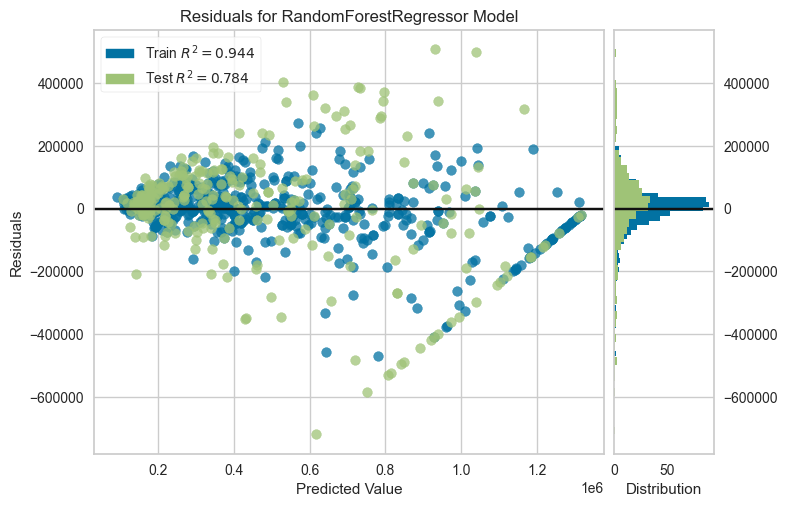

In [46]:
plot_model(tuned_rf)

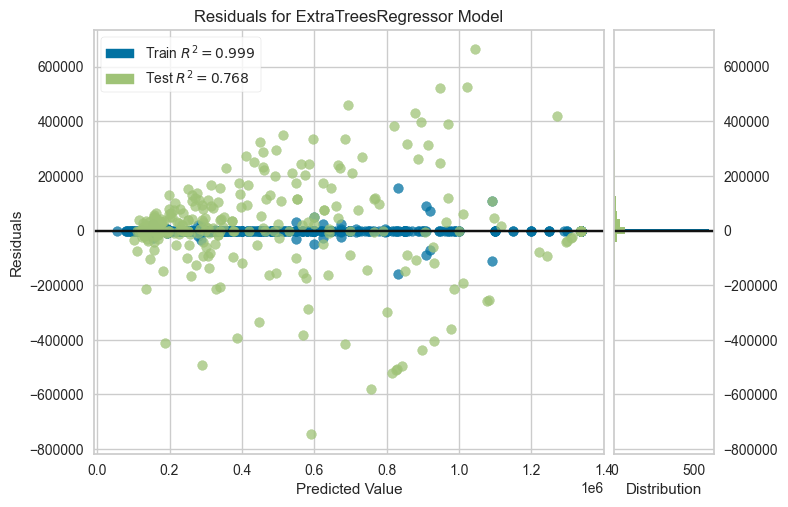

In [47]:
plot_model(tuned_et)

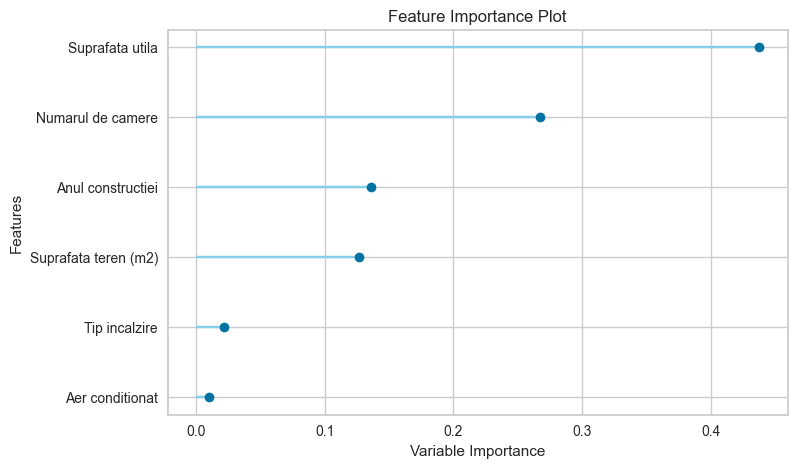

In [48]:
plot_model(tuned_rf, plot='feature')

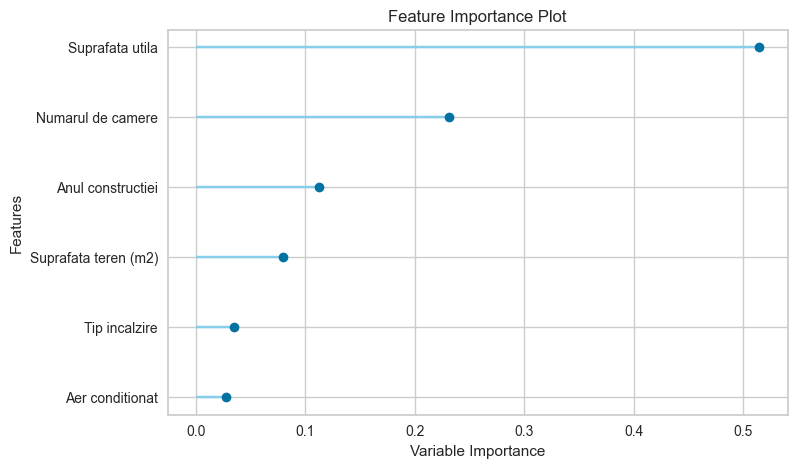

In [49]:
plot_model(tuned_et, plot="feature")

Prediction

In [50]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,115492.2810,29553657133.8848,171911.7714,0.7841,0.3606,0.3266


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
170,154.000000,8.0,100.0,2023.0,4.0,0,200000.0,171670.741746
303,143.570007,7.0,200.0,2022.0,4.0,0,148000.0,153497.251992
568,335.000000,7.0,20.0,2005.0,5.0,1,780000.0,498647.475686
872,240.000000,7.0,330.0,2022.0,4.0,0,240000.0,267701.251274
451,288.000000,8.0,172.0,2012.0,8.0,0,288000.0,366520.386888
...,...,...,...,...,...,...,...,...
410,147.000000,7.0,350.0,2023.0,4.0,0,120000.0,201741.094434
164,100.000000,8.0,504.0,2004.0,5.0,0,335000.0,330016.216121
323,300.000000,7.0,533.0,2008.0,5.0,1,350000.0,467657.906949
877,87.000000,2.0,30.0,1948.0,3.0,0,69000.0,164996.457293


In [51]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,111526.0348,31709056481.4609,178070.3695,0.7683,0.3770,0.3160


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
170,154.000000,8.0,100.0,2023.0,4.0,0,200000.0,169042.78
303,143.570007,7.0,200.0,2022.0,4.0,0,148000.0,129279.96
568,335.000000,7.0,20.0,2005.0,5.0,1,780000.0,446705.99
872,240.000000,7.0,330.0,2022.0,4.0,0,240000.0,240000.00
451,288.000000,8.0,172.0,2012.0,8.0,0,288000.0,278000.00
...,...,...,...,...,...,...,...,...
410,147.000000,7.0,350.0,2023.0,4.0,0,120000.0,197579.97
164,100.000000,8.0,504.0,2004.0,5.0,0,335000.0,293529.98
323,300.000000,7.0,533.0,2008.0,5.0,1,350000.0,466276.50
877,87.000000,2.0,30.0,1948.0,3.0,0,69000.0,198137.99


In [52]:
final_rf = finalize_model(tuned_rf)

In [53]:
final_et = finalize_model(tuned_et)

In [62]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,51725.4470,5553793886.9498,74523.7807,0.9594,0.1815,0.1492


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
170,154.000000,8.0,100.0,2023.0,4.0,0,200000.0,178974.462432
303,143.570007,7.0,200.0,2022.0,4.0,0,148000.0,152953.538259
568,335.000000,7.0,20.0,2005.0,5.0,1,780000.0,684680.859677
872,240.000000,7.0,330.0,2022.0,4.0,0,240000.0,245541.015716
451,288.000000,8.0,172.0,2012.0,8.0,0,288000.0,307378.983999
...,...,...,...,...,...,...,...,...
410,147.000000,7.0,350.0,2023.0,4.0,0,120000.0,165049.519421
164,100.000000,8.0,504.0,2004.0,5.0,0,335000.0,332218.538976
323,300.000000,7.0,533.0,2008.0,5.0,1,350000.0,403023.356685
877,87.000000,2.0,30.0,1948.0,3.0,0,69000.0,124790.994801


In [63]:
predict_model(final_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2622.3964,186513515.9112,13656.9951,0.9986,0.0179,0.0047


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
170,154.000000,8.0,100.0,2023.0,4.0,0,200000.0,192500.0
303,143.570007,7.0,200.0,2022.0,4.0,0,148000.0,148000.0
568,335.000000,7.0,20.0,2005.0,5.0,1,780000.0,780000.0
872,240.000000,7.0,330.0,2022.0,4.0,0,240000.0,240000.0
451,288.000000,8.0,172.0,2012.0,8.0,0,288000.0,283000.0
...,...,...,...,...,...,...,...,...
410,147.000000,7.0,350.0,2023.0,4.0,0,120000.0,120000.0
164,100.000000,8.0,504.0,2004.0,5.0,0,335000.0,335000.0
323,300.000000,7.0,533.0,2008.0,5.0,1,350000.0,350000.0
877,87.000000,2.0,30.0,1948.0,3.0,0,69000.0,69000.0


In [64]:
unseen_predictions = predict_model(final_rf, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,62818.3230,10794278935.9870,103895.5193,0.9039,0.2281,0.1770


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,112.000000,7.0,143.0,1936.0,4.0,1,199000.0,181162.371111
1,60.000000,8.0,27.0,1940.0,3.0,0,79000.0,148695.894991
2,212.000000,7.0,207.0,2023.0,4.0,0,450000.0,360940.388757
3,229.000000,8.0,212.0,2023.0,5.0,0,481600.0,400059.541967
4,131.889999,7.0,115.0,1950.0,8.0,0,235000.0,260277.889755


In [65]:
unseen_predictions = predict_model(final_et, data = data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,21951.9032,5558010683.6887,74552.0669,0.9505,0.1403,0.0486


,Suprafata utila,Tip incalzire,Suprafata teren (m2),Anul constructiei,Numarul de camere,Aer conditionat,Pret,prediction_label
0,112.000000,7.0,143.0,1936.0,4.0,1,199000.0,144057.6
1,60.000000,8.0,27.0,1940.0,3.0,0,79000.0,157663.0
2,212.000000,7.0,207.0,2023.0,4.0,0,450000.0,450000.0
3,229.000000,8.0,212.0,2023.0,5.0,0,481600.0,481600.0
4,131.889999,7.0,115.0,1950.0,8.0,0,235000.0,234750.0
